# Analisys of domestric electric energy consumption 
A. input data - 1. year 2.mese
B. data format- .csv
C. results - 1. Consumo energetico totale [kWh] 2. Consumo energetico giornaliero per ogni giorno del mese [kWh]

In [13]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [18]:
using CSV
using DataFrames
using Plots
using Dates

## read CSV

In [34]:
#input
year = "2022"
mounth = "gennaio"

# output - data frame
df = CSV.read("data_"*year*"/ExportData_"*mounth*".csv", DataFrame, delim=';',
    quoted=true, decimal=',', dateformat="dd/mm/yyyy",header=1)

print(df[:,94:98])

31×5 DataFrame
 Row │ 23:00-23:15  23:15-23:30  23:30-23:45  23:45-00:00  Column98 
     │ Float64      Float64      Float64      Float64      Missing  
─────┼──────────────────────────────────────────────────────────────
   1 │       0.02         0.008        0.008        0.019   missing 
   2 │       0.004        0.016        0.004        0.004   missing 
   3 │       0.008        0.009        0.014        0.018   missing 
   4 │       0.052        0.063        0.054        0.052   missing 
   5 │       0.013        0.034        0.017        0.008   missing 
   6 │       0.047        0.056        0.05         0.013   missing 
   7 │       0.049        0.043        0.246        0.415   missing 
   8 │       0.05         0.045        0.052        0.048   missing 
   9 │       0.042        0.05         0.041        0.069   missing 
  10 │       0.014        0.008        0.007        0.015   missing 
  11 │       0.012        0.01         0.004        0.005   missing 
  12 │       0.049 

┌ Warning: thread = 1 warning: parsed expected 97 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV /Users/diegopisera/.julia/packages/CSV/0Elut/src/file.jl:578


In [35]:
names(df)

98-element Vector{String}:
 "Giorno"
 "00:00-00:15"
 "00:15-00:30"
 "00:30-00:45"
 "00:45-01:00"
 "01:00-01:15"
 "01:15-01:30"
 "01:30-01:45"
 "01:45-02:00"
 "02:00-02:15"
 "02:15-02:30"
 "02:30-02:45"
 "02:45-03:00"
 ⋮
 "21:15-21:30"
 "21:30-21:45"
 "21:45-22:00"
 "22:00-22:15"
 "22:15-22:30"
 "22:30-22:45"
 "22:45-23:00"
 "23:00-23:15"
 "23:15-23:30"
 "23:30-23:45"
 "23:45-00:00"
 "Column98"

In [33]:
df."00:00-00:15"

31-element Vector{Float64}:
 0.029
 0.007
 0.015
 0.009
 0.06
 0.007
 0.012
 0.103
 0.043
 0.061
 0.014
 0.007
 0.048
 ⋮
 0.038
 0.014
 0.054
 0.004
 0.036
 0.035
 0.055
 0.019
 0.013
 0.003
 0.16
 0.072

In [38]:
Dates.dayname(df[10,1])

"Monday"

In [ ]:
for j = 1:N_day

DayOfTheWeek[j] = Dates.dayname(j,1)




days_of_the_week = DataFrame(DayOfTheWeek=[20, 40])

In [27]:
for j=1:size(df,2)
    df[j,98] = Dates.dayname(j,1)
end
df.23:00-23:15

LoadError: MethodError: no method matching dayname(::Int64, ::Int64)
[0mClosest candidates are:
[0m  dayname(::Integer; locale) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Dates/src/query.jl:150
[0m  dayname(::Integer, [91m::Dates.DateLocale[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Dates/src/query.jl:148

In [25]:
Dates.dayname(df[1,1])

"Saturday"

In [46]:
# Number of day in the mounth
N_day = Int64(size(df,1))

31

In [47]:
# Monthly energy consumption [kWh]
sum(sum(df[1:28,j]) for j =2:97)

74.887

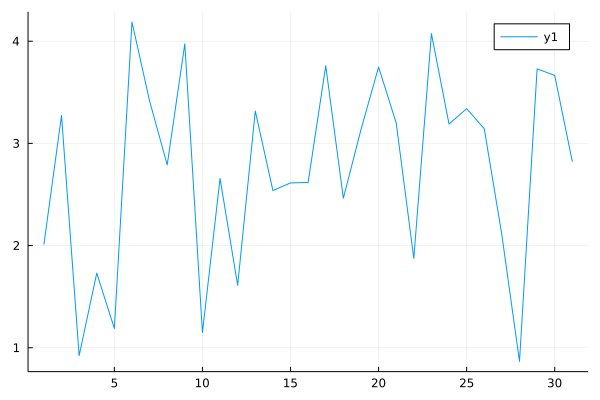

In [48]:
# Daily energy consumption
 
daily_E_cons = zeros(N_day)

for d = 1:N_day
daily_E_cons[d] = sum(df[d,2:97])
end

## output
daily_E_cons

## plot output
plot(daily_E_cons)